In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
def load_and_preprocess_data():
    # Load data from Kaggle input directory
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')
    
    # Extract labels and images
    y_train = train_data['label'].values
    x_train = train_data.drop(columns=['label']).values
    x_test = test_data.values
    
    # Normalize pixel values to range [0,1]
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    # Reshape images to (num_samples, 28, 28, 1)
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    
    # Convert labels to one-hot encoded format
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    
    return (x_train, y_train), (x_test, test_data)

In [4]:
# 2. Build the CNN model
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

In [5]:
# 3. Train and evaluate the model
def train_and_evaluate():
    # Load and preprocess data
    (x_train, y_train), (x_test, test_data) = load_and_preprocess_data()
    
    # Build model
    model = build_model()
    
    # Print model summary
    model.summary()
    
    # Train the model
    history = model.fit(x_train, y_train,
                       batch_size=128,
                       epochs=30,
                       validation_split=0.2,
                       verbose=1)
    
    return model, history, (x_test, test_data)

In [6]:
# 4. Generate predictions for Kaggle submission
def generate_submission(model, x_test, test_data):
    # Predict on test data
    predictions = model.predict(x_test)
    predicted_labels = np.argmax(predictions, axis=1)
    
    # Create submission file
    submission = pd.DataFrame({
        'ImageId': np.arange(1, len(predicted_labels) + 1),
        'Label': predicted_labels
    })
    submission.to_csv('submission.csv', index=False)
    print("Submission file 'submission.csv' created successfully!")

In [7]:
# 5. Visualize results
def visualize_results(history, x_test, model):
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Visualize some test predictions
    predictions = model.predict(x_test[:5])
    plt.figure(figsize=(12, 2))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f'Pred: {np.argmax(predictions[i])}')
        plt.axis('off')
    plt.show()

C:\Users\SUBHRANIL DAS\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8752 - loss: 0.4022 - val_accuracy: 0.9713 - val_loss: 0.0923
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 29s 111ms/step - accuracy: 0.9618 - loss: 0.1240 - val_accuracy: 0.9813 - val_loss: 0.0607
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.9725 - loss: 0.0880 - val_accuracy: 0.9848 - val_loss: 0.0464
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.9779 - loss: 0.0710 - val_accuracy: 0.9851 - val_loss: 0.0456
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.9809 - loss: 0.0622 - val_accuracy: 0.9832 - val_loss: 0.0551
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.9845 - loss: 0.0512 - val_accuracy: 0.9843 - val_loss: 0.0492
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.9858 - loss: 0.0468 - val_accuracy: 0.9865 - val_loss: 0.0459
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - accuracy: 0.9874 - loss: 0.0401 -

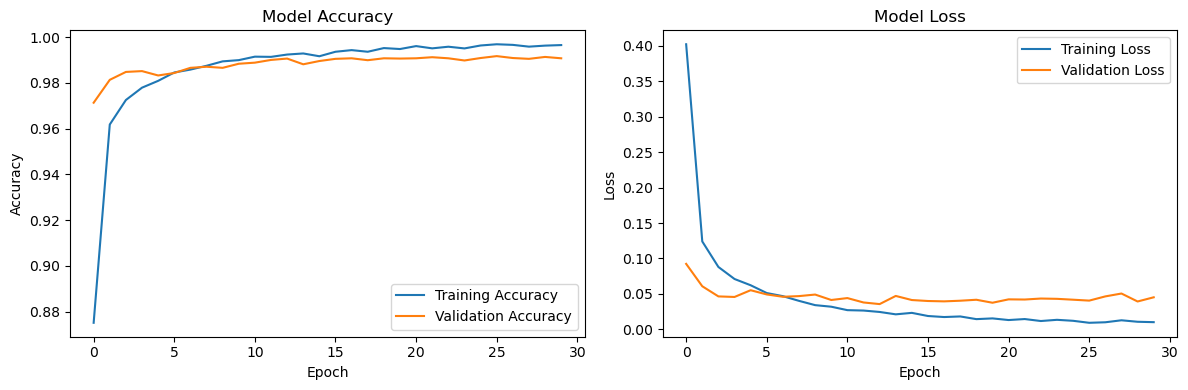

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


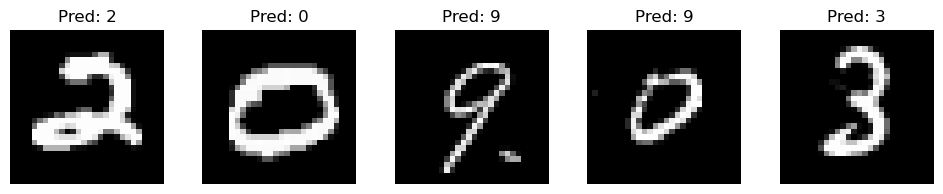

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
Submission file 'submission.csv' created successfully!


In [8]:
# 6. Main execution
if __name__ == '__main__':
    # Set random seed for reproducibility
    tf.random.set_seed(42)
    np.random.seed(42)
    
    # Train and evaluate
    model, history, (x_test, test_data) = train_and_evaluate()
    
    # Visualize results
    visualize_results(history, x_test, model)
    
    # Generate Kaggle submission file
    generate_submission(model, x_test, test_data)

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# 1. Load and preprocess the Kaggle MNIST dataset
def load_and_preprocess_data():
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')
    
    y_train = train_data['label'].values
    x_train = train_data.drop(columns=['label']).values
    x_test = test_data.values
    
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    
    return (x_train, y_train), (x_test, test_data)

# 2. Build the CNN model
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

# 3. Train the model with augmentation
def train_and_save_model():
    (x_train, y_train), _ = load_and_preprocess_data()
    
    # Manually split the data into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
    
    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1
    )
    datagen.fit(x_train)
    
    model = build_model()
    model.summary()
    
    # Train the model with the generator for training data and separate validation data
    history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                       epochs=15,
                       validation_data=(x_val, y_val),
                       verbose=1)
    
    # Save the model
    model.save('mnist_model.h5')
    print("Model saved as 'mnist_model.h5'")

if __name__ == '__main__':
    tf.random.set_seed(42)
    np.random.seed(42)
    train_and_save_model()

C:\Users\SUBHRANIL DAS\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

C:\Users\SUBHRANIL DAS\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.7625 - loss: 0.7287 - val_accuracy: 0.9681 - val_loss: 0.1062
Epoch 2/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9175 - loss: 0.2730 - val_accuracy: 0.9714 - val_loss: 0.0868
Epoch 3/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9379 - loss: 0.2040 - val_accuracy: 0.9819 - val_loss: 0.0547
Epoch 4/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 19s 71ms/step - accuracy: 0.9484 - loss: 0.1686 - val_accuracy: 0.9858 - val_loss: 0.0436
Epoch 5/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.9556 - loss: 0.1484 - val_accuracy: 0.9842 - val_loss: 0.0471
Epoch 6/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.9610 - loss: 0.1294 - val_accuracy: 0.9883 - val_loss: 0.0354
Epoch 7/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.9651 - loss: 0.1175 - val_accuracy: 0.9886 - val_loss: 0.0362
Epoch 8/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.9673 - loss: 0.1084 - 

Model saved as 'mnist_model.h5'
